<a href="https://colab.research.google.com/github/retact/Bio-signal-processing/blob/main/lecture13/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture12 2021-12-22**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/My Drive/Biological_signal/
%cd Bio-signal-processing/

/content/drive/My Drive/Biological_signal
/content/drive/My Drive/Biological_signal/Bio-signal-processing


# **TASK1**


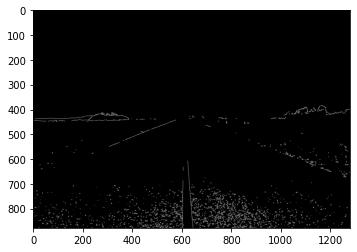

In [43]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img= cv2.imread("src/road.jpg")
img_g = cv2.imread("src/road.jpg",0)
img_canny = cv2.Canny(img_g, 300,450)
plt.imshow(img_canny, cmap='gray')

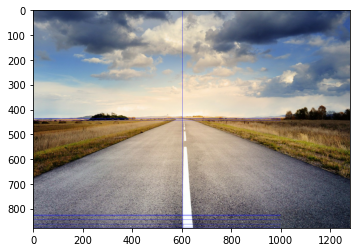

In [44]:
lines = cv2.HoughLines(img_canny, 0.5, np.pi/180, 100)

for i in lines[:]:
  rho = i[0][0]
  theta = i[0][1]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  x1 = int(x0 + 1000 * (-b))
  y1 = int(y0 + 1000 * (a))
  x2 = int(x0 - 1000 * (-b))
  y2 = int(y0 - 1000 * (a))
  cv2.line(img, (x1,y1), (x2,y2), (255,0,0),1)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# **TASK2**

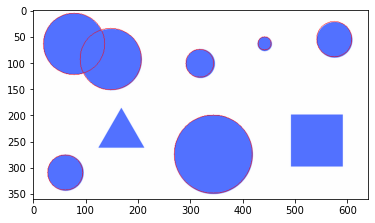

In [52]:
img= cv2.imread("src/sa_cir.png",0)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1, minDist=10, param1=100, param2=45, minRadius=1, maxRadius=300)

img = cv2.imread("src/sa_cir.png") 
for i in circles[0]:
  cv2.circle(img, (i[0],i[1]),i[2],(0,0,255),1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# **TASK3**

In [56]:
HAAR_FILE = "haarcascades/haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(HAAR_FILE)
img= cv2.imread("src/group_photo.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

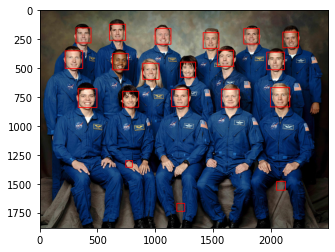

In [57]:
face = cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(30,30))
for x, y, w, h in face:
  cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255),5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
